In [1]:
import matplotlib.pyplot as plt
# import numpy as np
import autograd.numpy as np
from autograd import elementwise_grad
from Functions import *
from Optimizations import *
from Saving import *

import matplotlib.pyplot as plt
import numpy as np
import time, os, subprocess

import plotly.graph_objects as go


from scipy import stats

import pickle

%load_ext autoreload
%autoreload 2

In [4]:
f = lambda inp: quad_sin(inp, {"epsilon": 0.1})
grad_f = lambda inp: grad_quad_sin(inp, {"epsilon": 0.1}) 

In [69]:
grad_f(np.array([[50.], [50.]])) * 0.2

array([[3253.25355124],
       [3253.25355124]])

In [3]:
f = AckleyProblem
grad_f = GradAckleyProblem

In [89]:
X = np.linspace(-100, 100, 200)
Y = np.linspace(-100, 100, 200)

inp = np.array(np.meshgrid(X, Y))
out = f(inp)

In [6]:
fig = go.Figure(data=[go.Surface(z=out, x=X, y=Y, colorscale="Viridis")])

fig.update_layout(title='Function', autosize=False,
                  width=1000, height=800,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

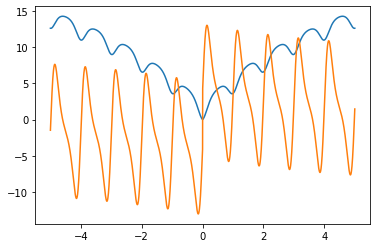

In [32]:
X = np.linspace(-5,5, 5000)

inp = np.array([X])
out = f(inp) # np.cos(inp* np.pi * 2) - 4*np.cos(inp * np.pi) - 4*np.cos((inp - np.pi))
grad_out = grad_f(inp)
all_paths
plt.plot(inp[0], out)
plt.plot(inp[0], grad_out[0])

plt.show()


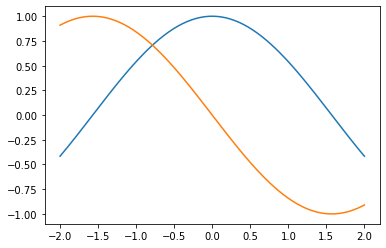

In [11]:
X = np.linspace(-2,2, 200)

inp = np.array(X)
out = np.cos(inp) #f(inp) #np.cos(inp* np.pi * 2) - 4*np.cos(inp * np.pi) - 4*np.cos((inp - np.pi))
grad_out = -np.sin(inp) #grad_f(out)

plt.plot(inp, out)
plt.plot(inp, grad_out)


plt.show()


The function needs to specify:
Domain
Boundary behaviour (for now reflecting)
weight function 
resampling method given weights 
number of particles -- Should the praticle be some class? Nah, just have two arrays, particle array and weight array for each particle

It will do standard diffusion. Should it also have an interactive term? Not for now, we can implement that later.

On what should tau depend? ask what would be best. 

In [90]:
def resample_positions_softmax(weights, positions, beta=1):
    sum_exp_weights = sum([np.exp(beta*w) for w in weights])
    probabilities = np.array([np.exp(beta*w) for w in weights]) / sum_exp_weights
    probabilities = np.nan_to_num(probabilities)
    pos_filter =  np.random.choice(list(range(len(positions))), len(positions), p=probabilities)
    return np.array(positions)[np.array(pos_filter)]

In [91]:
def gamma(t):
    return 0.001 / np.log(2*t + 2) 

def temperature(t):
    return 3 / np.log(t + 2)

def weight_function(U, grad_U, x):
    return np.linalg.norm(grad_U(x))

num_particles = 10
process = {}
process["start"] = [[np.random.uniform(-99, 99), np.random.uniform(-99, 99)] for _ in range(num_particles)]
process["gamma"] = gamma
process["temperature"] = temperature
process["epsilon"] = 0
process["weight_function"] = weight_function

process["resample_function"] = lambda w, end_p: resample_positions_softmax(w, end_p, beta=-0.001) #
# process["resample_function"] =  lambda w, end_p: end_p # 
all_paths = diffusion_resmpaling(f, grad_f, process, 50, 20, domain_enforcer=hyper_cube_enforcer(100, -100, 2))

In [8]:
all_paths_processed = np.array([[[[p_step, f(p_step)] for p_step in particle_path] for particle_path in step_path] for step_path in all_paths])
all_paths_processed.shape

(50, 10, 21, 2)

In [42]:
sampling_all_paths_processed =all_paths_processed

In [39]:
not_sampling_all_paths_processed = all_paths_processed

In [82]:
import plotly.graph_objects as go


frames=[]

available_colors = ["red", "green"]
        
for i in range(len(all_paths_processed)):
    curr_paths = all_paths_processed[i]
    color_use = available_colors[i % len(available_colors)]
    
    for j in range(len(curr_paths)):

        frames.append(go.Frame(data=[go.Scatter(x=curr_paths[:, j, 0], y=curr_paths[:, j, 1],
                                    mode="markers",
                                    marker=dict(color=color_use, size=10))]))
        

fig = go.Figure(
    data=[go.Scatter(x=inp, y=out, mode="lines"), go.Scatter(x=inp, y=out, mode="lines")],
    layout=go.Layout(
        xaxis=dict(range=[-4, 4], autorange=False),
        yaxis=dict(range=[-1, 7], autorange=False),
        title="Start Title",
        updatemenus=[dict(
            type="buttons",
            buttons=[dict(label="Play",
                          method="animate",
                          args=[None])])]
    ),
    frames=frames
)

fig.show()

In [43]:
ani_path = create_animation_1d_pictures_particles(not_sampling_all_paths_processed, inp[0], out, "not_sampled")

In [44]:
create_animation(ani_path, "test.mp4", framerate=5)

In [ ]:
ani_path =  create_animation_1d_pictures_particles(sampling_all_paths_processed, inp[0], out, "sampled")

In [ ]:
create_animation(ani_path, "test.mp4",framerate=4)

In [92]:
all_paths_processed = np.array([[[[p_step[0], p_step[1], f(p_step)] for p_step in particle_path] for particle_path in step_path] for step_path in all_paths])
all_paths_processed.shape

(50, 10, 21, 3)

In [93]:
ani_path = create_animation_2d_pictures_particles(all_paths_processed, inp[0], inp[1], out, folder_name="sampled_beta_0.001_temp_3_gamma_0.001", graph_details={"lines": 20})

In [94]:
create_animation(ani_path, "test.mp4", framerate=5)